In [2]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
from pprint import pprint
import requests
import json
import html
from scipy.stats import linregress
import statsmodels.api as sm
import seaborn as sns

In [3]:
csv_merge = "../Resources/merged2014.csv"
df_2014 = pd.read_csv(csv_merge)
df_2014.head()

,Unnamed: 0,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,...,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,Cluster-Group,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2,2014,Europe & Central Asia,SE,SWE,3,Sweden,83.70,100,67,...,91,53,4,High capacity,14,0.82250,0.60784,0.70078,0.8802,0.88656
1,3,2014,Europe & Central Asia,FR,FRA,4,France,80.21,91,75,...,60,79,5,High capacity,4,0.89384,0.96078,1.00000,0.8812,0.80029
2,4,2014,East Asia & Pacific,NZ,NZL,4,New Zealand,80.01,81,76,...,0,67,14,High capacity,9,0.86436,0.78431,0.84251,1.0000,0.75057
3,5,2014,Europe & Central Asia,NL,NLD,6,Netherlands,75.79,95,79,...,26,46,13,High capacity,5,0.88966,1.00000,0.92913,0.9224,0.81751
4,6,2014,Europe & Central Asia,NO,NOR,7,Norway,74.59,88,70,...,17,48,8,High capacity,13,0.83572,0.68627,0.75590,0.9380,0.81328


In [6]:
ready = df_2014['Readiness-Scaled'] == 0
ready

0     False
1     False
2     False
3     False
4     False
      ...  
74    False
75    False
76    False
77    False
78     True
Name: Readiness-Scaled, Length: 79, dtype: bool

In [23]:
egov_2014_sorted = df_2014.sort_values(by= "E-Government Rank")
egov_2014_sorted.head()

,Unnamed: 0,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,...,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,Cluster-Group,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
7,9,2014,East Asia & Pacific,AU,AUS,10,Australia,68.33,92,86,...,46,40,20,High capacity,2,0.91034,0.94117,0.92913,0.9978,0.80405
25,29,2014,East Asia & Pacific,SG,SGP,29,Singapore,46.06,71,39,...,43,38,20,High capacity,3,0.90762,0.90196,0.99212,0.8515,0.87927
1,3,2014,Europe & Central Asia,FR,FRA,4,France,80.21,91,75,...,60,79,5,High capacity,4,0.89384,0.96078,1.00000,0.8812,0.80029
3,5,2014,Europe & Central Asia,NL,NLD,6,Netherlands,75.79,95,79,...,26,46,13,High capacity,5,0.88966,1.00000,0.92913,0.9224,0.81751
15,18,2014,East Asia & Pacific,JP,JPN,19,Japan,53.58,81,53,...,43,20,26,High capacity,6,0.88744,0.96078,0.94488,0.8621,0.85533


In [8]:
csv_merge = "../Resources/merged2016.csv"
df_2016 = pd.read_csv(csv_merge)
df_2016.head()

,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,Implementation-Social-Scaled,...,Impact-Political-Scaled,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2016,North America,CA,CAN,2,Canada,89.54,96,87,66,...,63,90,43,8,14,0.82847,0.91525,0.95652,0.85717,0.67173
1,2016,Europe & Central Asia,FR,FRA,3,France,85.13,100,77,70,...,90,55,62,5,10,0.84559,0.89831,0.94203,0.84452,0.75021
2,2016,North America,US,USA,4,United States of America,81.62,96,84,63,...,55,70,62,9,12,0.84201,0.89831,0.92754,0.88155,0.71696
3,2016,East Asia & Pacific,AU,AUS,5,Australia,81.15,85,79,76,...,45,75,61,11,2,0.91428,0.98305,0.97826,1.00000,0.76459
4,2016,East Asia & Pacific,NZ,NZL,7,New Zealand,79.38,92,53,63,...,81,100,55,2,8,0.86530,0.94915,0.94203,0.94024,0.71364


In [4]:
df_2014.describe()

,Unnamed: 0,Year,ODB-Rank,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,Implementation-Social-Scaled,Implementation-Accountability-Scaled,Implementation-Rank,Impact-Political-Scaled,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
count,79.000000,79.0,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,43.481013,2014.0,43.835443,33.527595,50.164557,33.987342,39.050633,28.063291,44.645570,21.936709,12.898734,17.835443,40.708861,77.658228,0.551474,0.540080,0.540312,0.683861,0.430258
std,24.658104,0.0,24.415438,22.460041,25.225359,24.170598,22.020910,19.792735,24.717915,26.933604,22.188352,23.748917,20.342675,57.867640,0.229436,0.246142,0.250825,0.213540,0.270179
min,2.000000,2014.0,3.000000,0.000000,0.000000,2.000000,2.000000,6.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.132860,0.078430,0.023620,0.157800,0.008360
25%,22.500000,2014.0,23.000000,14.070000,31.500000,13.500000,21.000000,11.500000,23.500000,0.000000,0.000000,0.000000,24.500000,24.000000,0.366210,0.333330,0.318895,0.535450,0.179440
50%,43.000000,2014.0,41.000000,30.700000,46.000000,31.000000,42.000000,22.000000,44.000000,7.000000,0.000000,6.000000,45.000000,70.000000,0.545010,0.549010,0.559050,0.728200,0.357050
75%,64.500000,2014.0,64.000000,50.335000,70.000000,50.500000,54.500000,39.000000,66.000000,35.000000,15.500000,29.000000,65.000000,124.000000,0.757840,0.705880,0.724405,0.862000,0.686765
max,85.000000,2014.0,86.000000,83.700000,100.000000,92.000000,83.000000,92.000000,86.000000,100.000000,100.000000,87.000000,65.000000,186.000000,0.910340,1.000000,1.000000,1.000000,0.886560


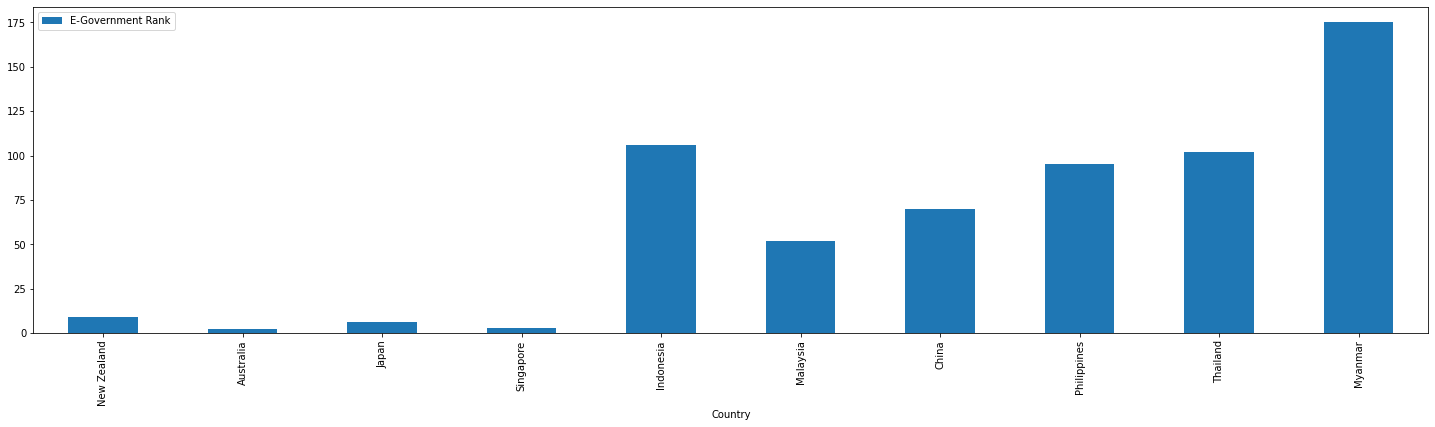

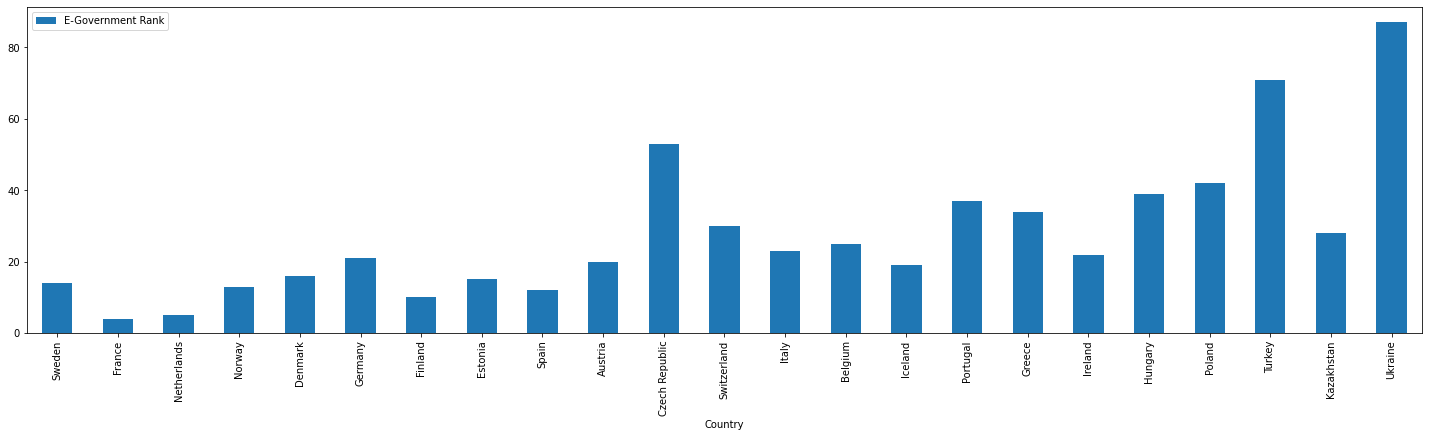

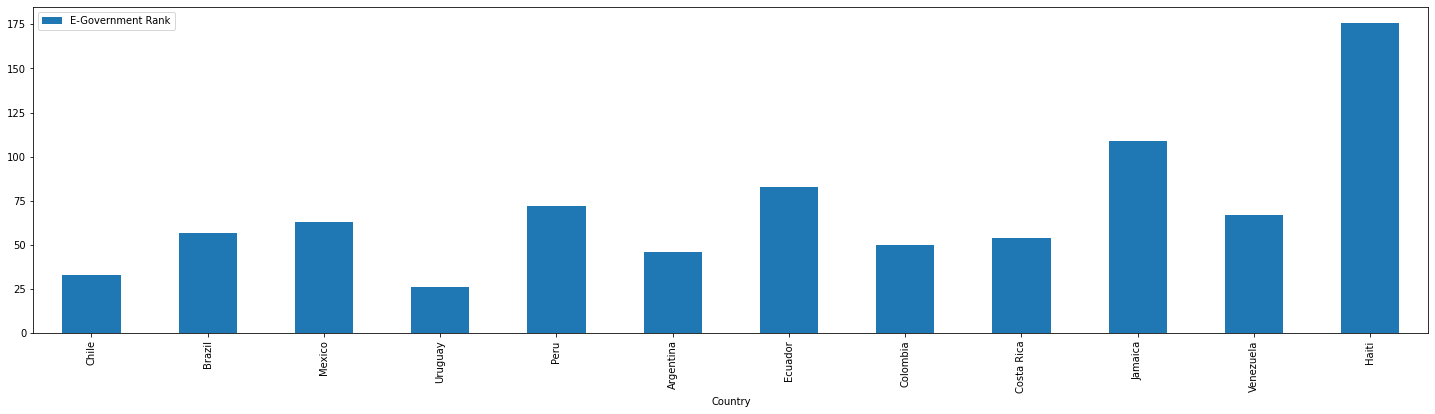

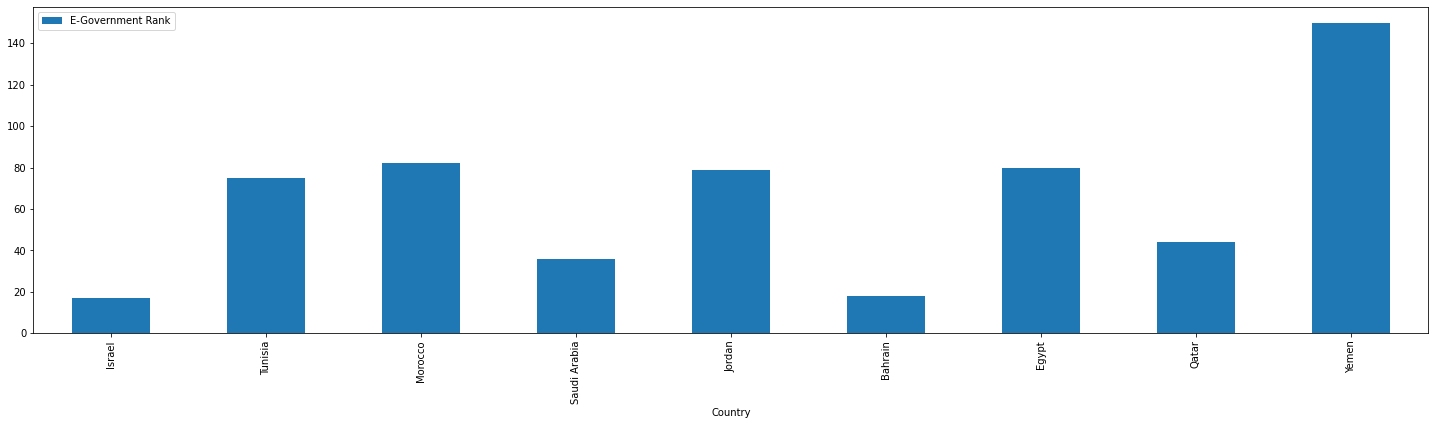

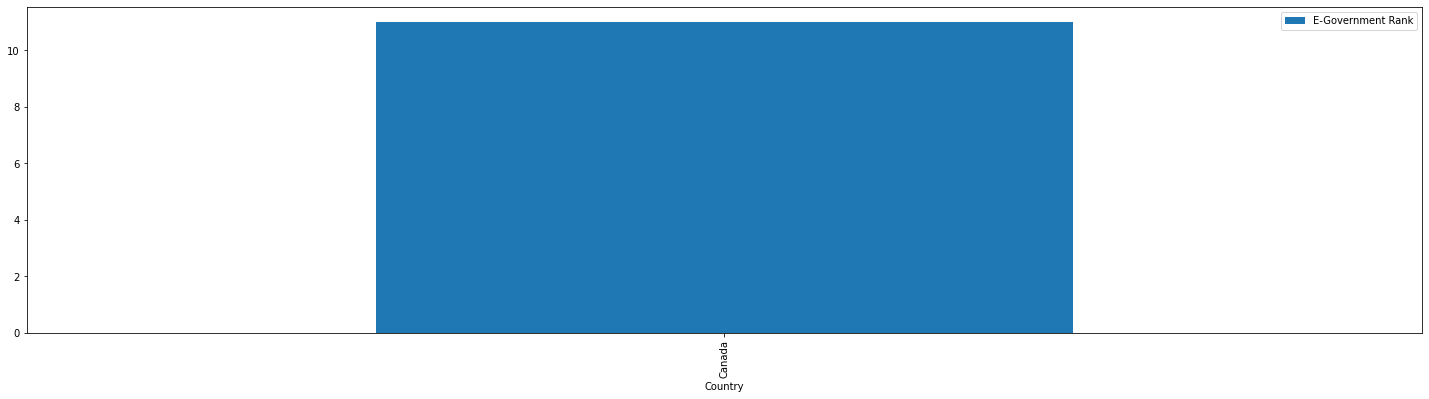

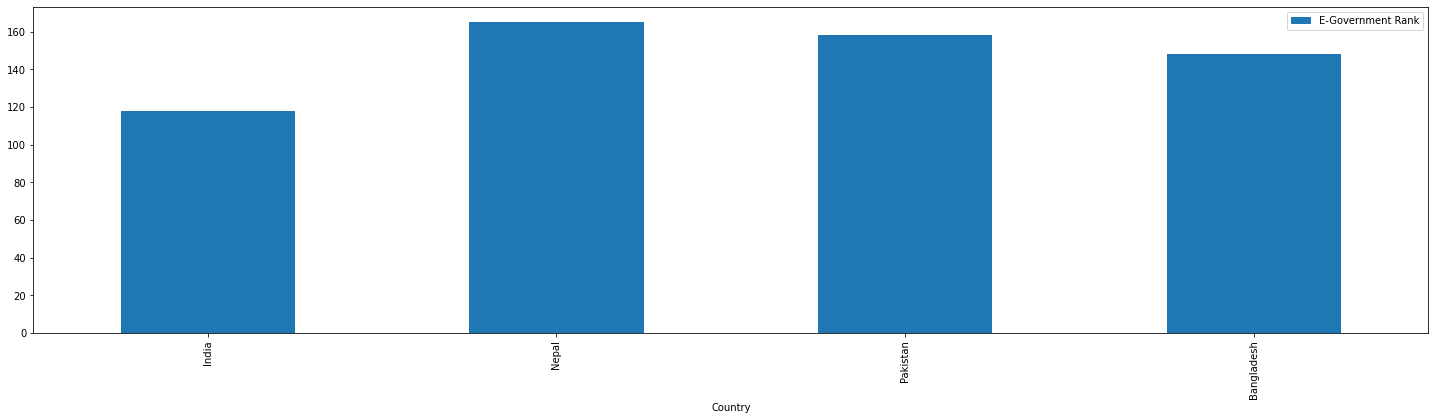

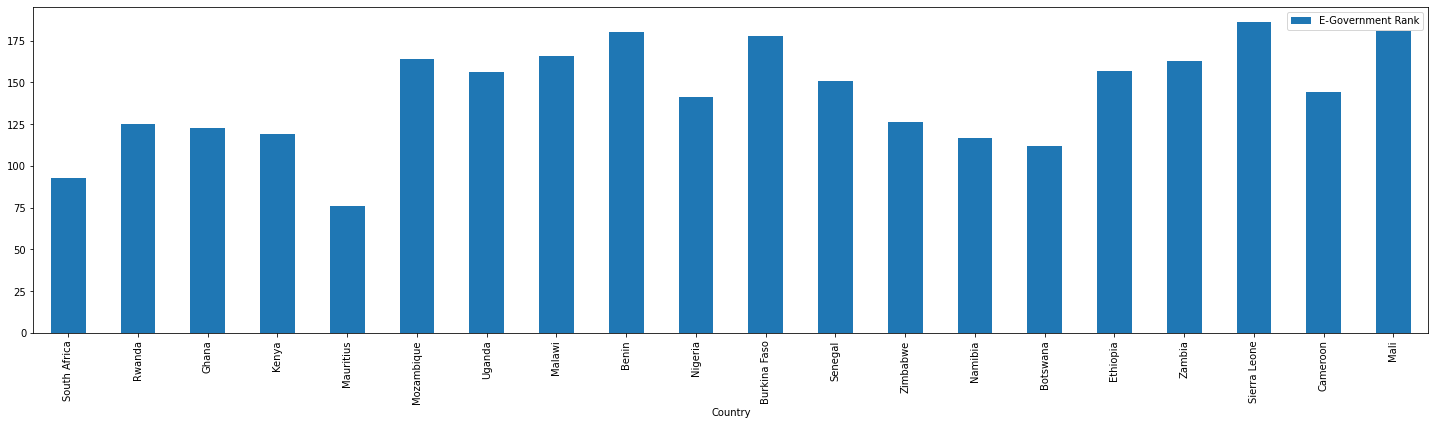

In [20]:
df_2016.sort_values(by = "E-Government Rank")
df_2016_grouped = df_2016.groupby(['Region'])
df_2014_grouped.plot.bar(x='Country',y='E-Government Rank',rot=90, figsize=(25,6));

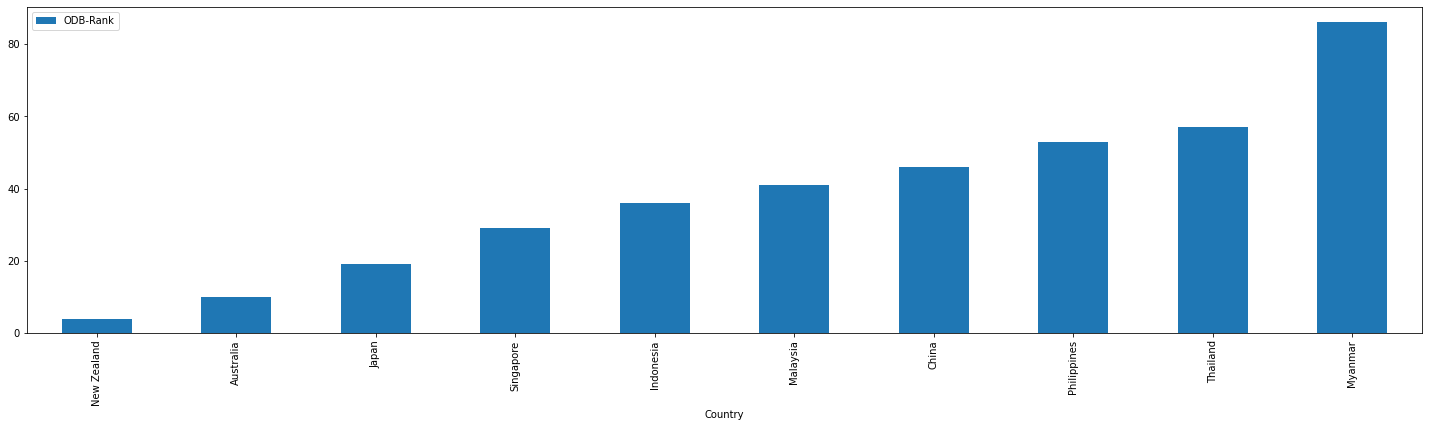

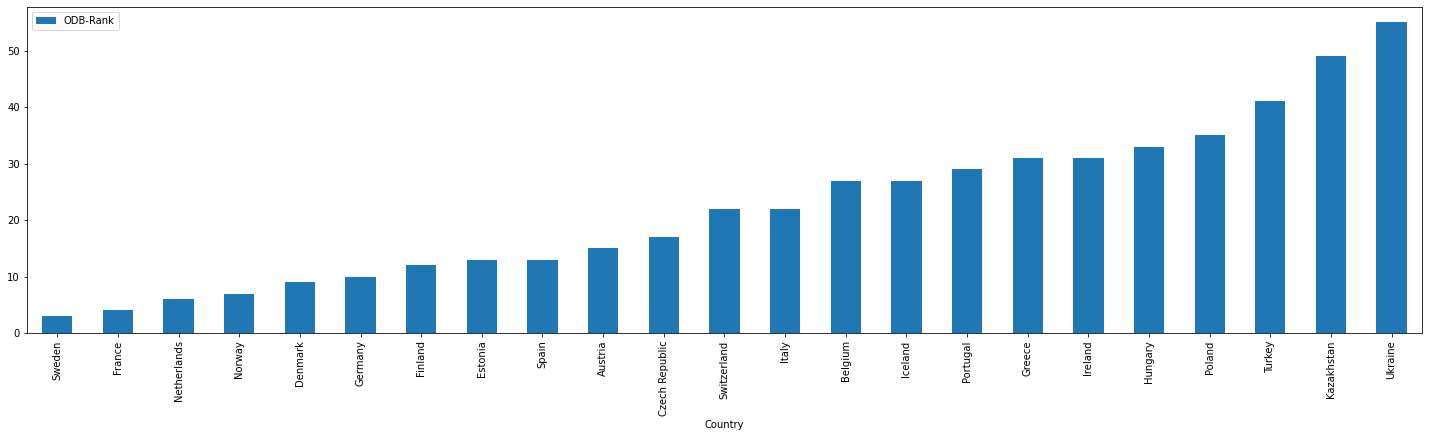

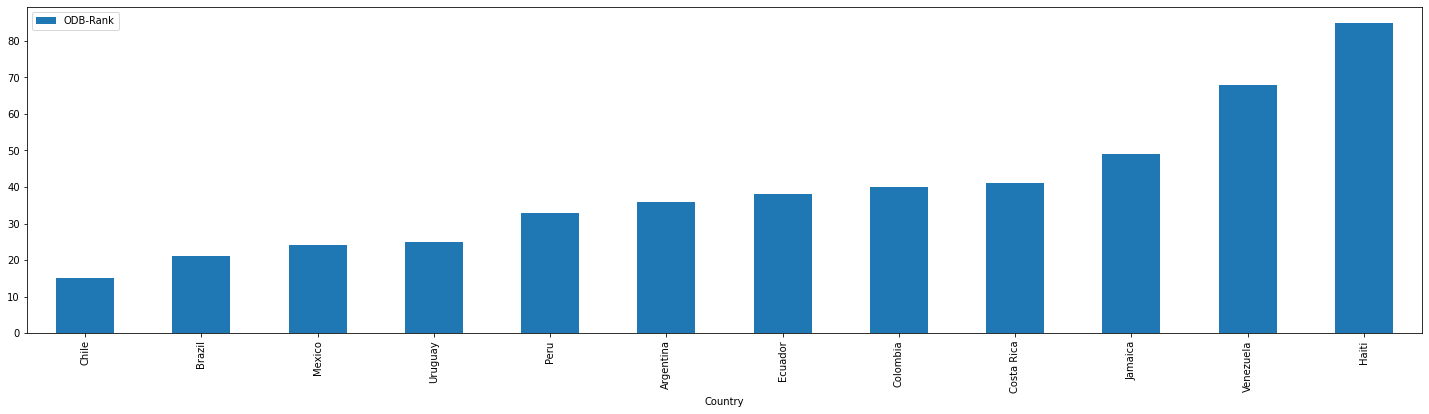

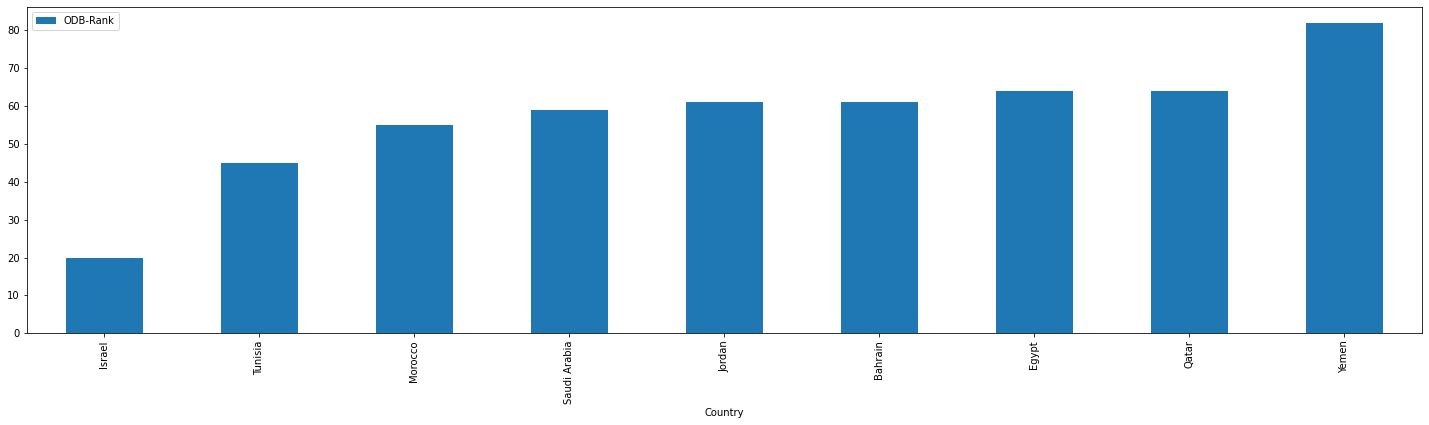

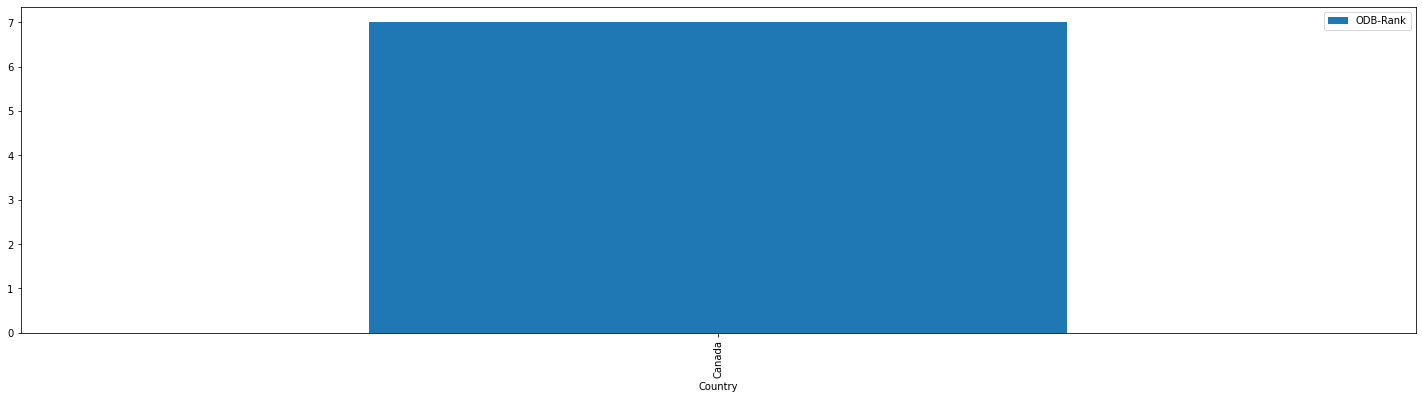

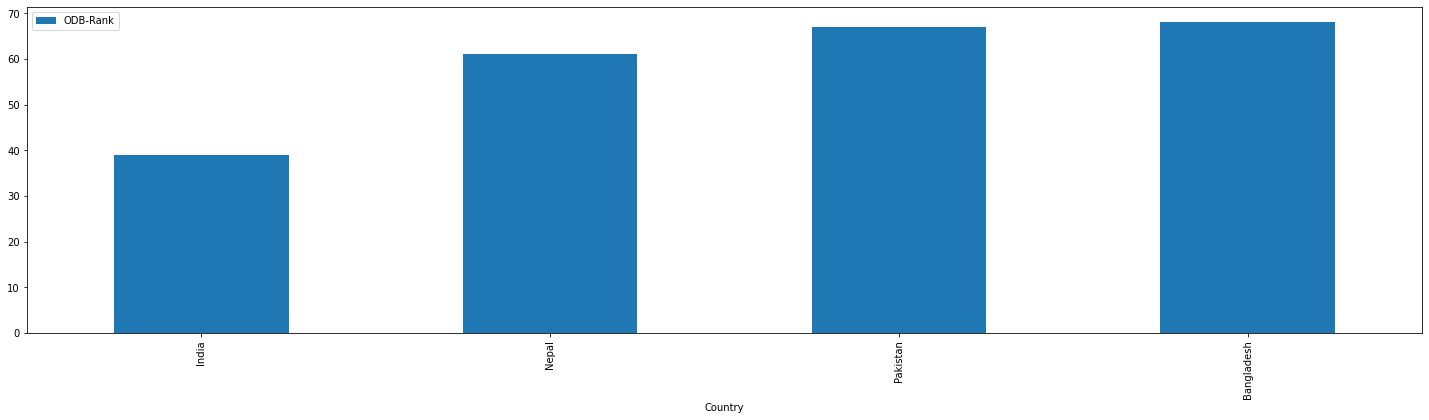

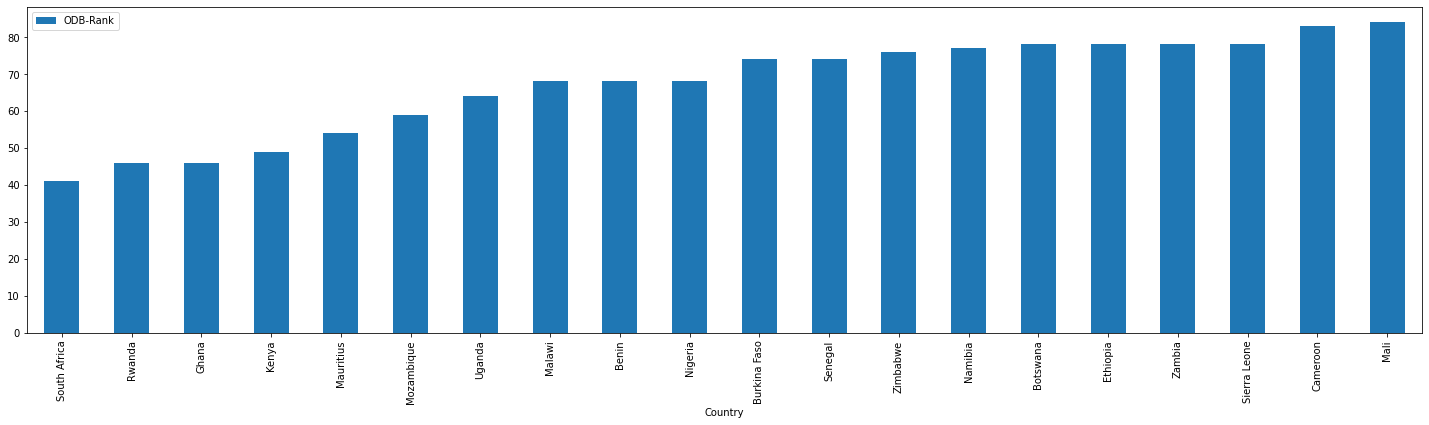

In [18]:
df_2014.sort_values(by = "ODB-Rank")
df_2014_grouped = df_2014.groupby(['Region'])
df_2014_grouped.head()
df_2014_grouped.plot.bar(x='Country',y='ODB-Rank',rot=90, figsize=(25,6));

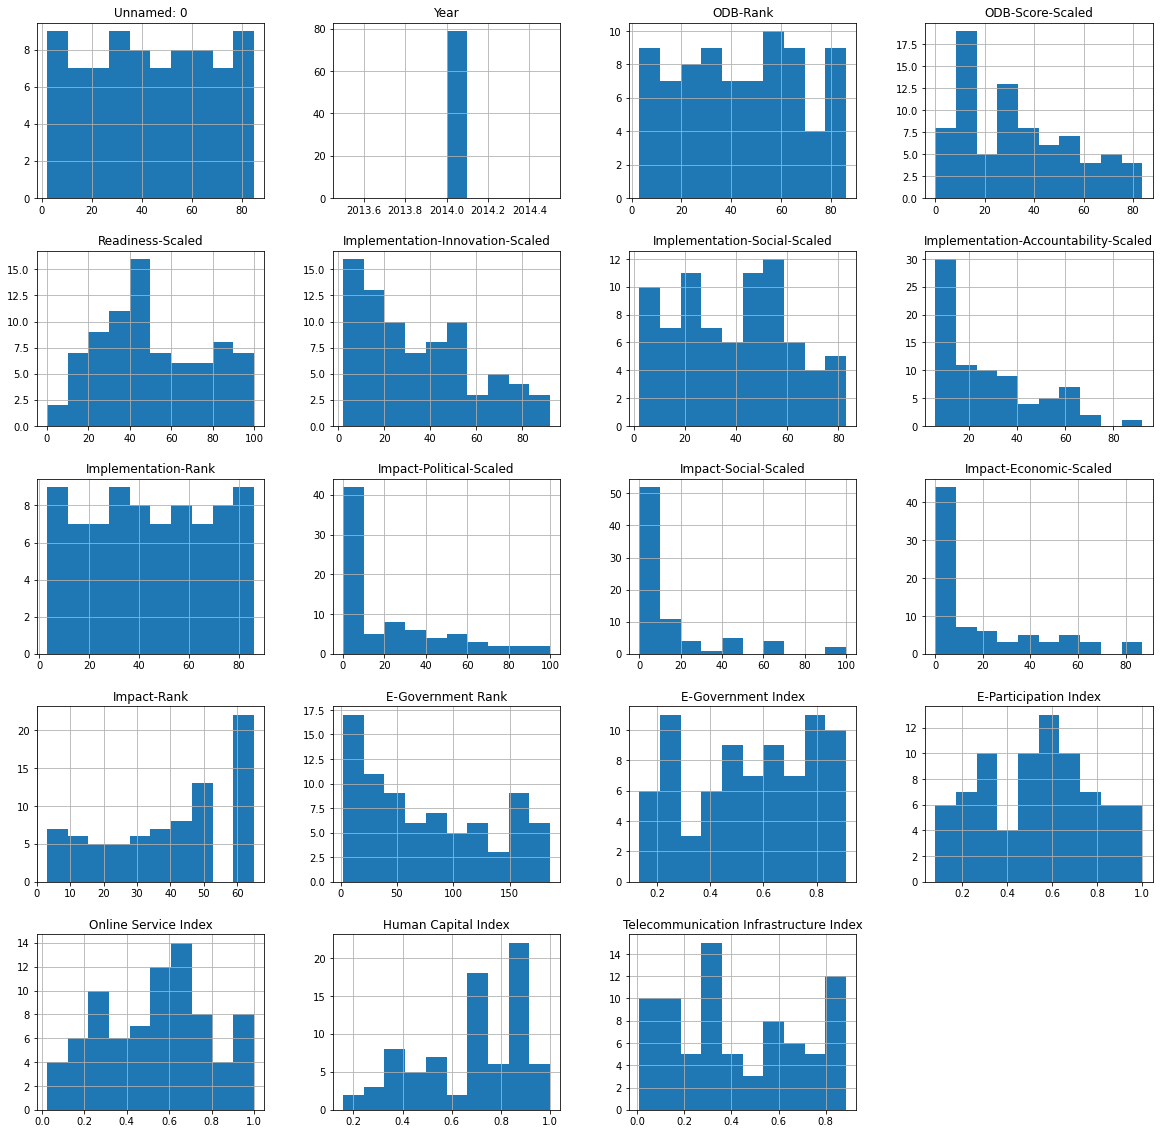

In [5]:
df_2014.hist(alpha=1, figsize=(20,20));

In [6]:
czechia = df_2014[df_2014['Country'] == "Czech Republic"]
czechia

colombia = df_2014[df_2014['Country'] == "Colombia"]
colombia

ghana = df_2014[df_2014['Country'] == 'Ghana']
ghana

,Unnamed: 0,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,...,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,Cluster-Group,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
43,47,2014,Sub-Saharan Africa,GH,GHA,46,Ghana,27.99,35,31,...,0,0,65,Capacity constrained,123,0.37354,0.39215,0.31496,0.5613,0.24438


# Egov and Online Service

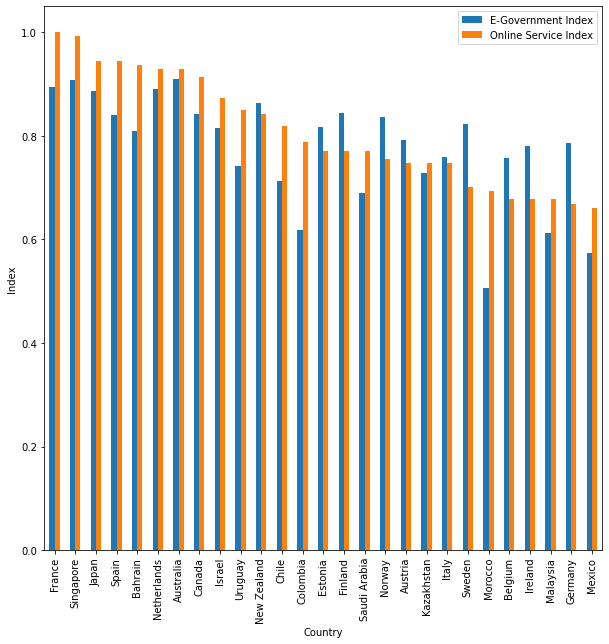

In [7]:
egov_online = df_2014[[ 'Country', "E-Government Index", "Online Service Index"]]
egov_online = egov_online.sort_values(by="Online Service Index", ascending = False)
high_rank1 = egov_online.iloc[0:27]
high_rank1 = high_rank1.set_index("Country");
fig, ax = plt.subplots(figsize = (10,10));
high_rank1.plot(kind="bar", ax=ax);
ax.set_xlabel('Country');
ax.set_ylabel('Index');

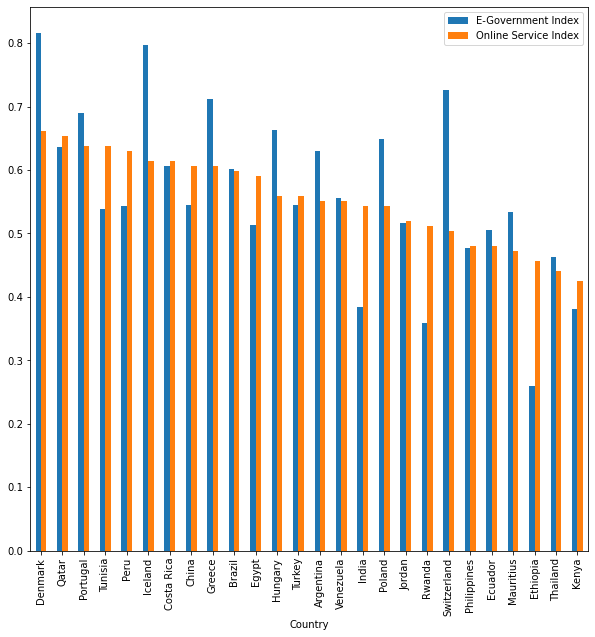

In [8]:
egov_online = df_2014[[ 'Country', "E-Government Index", "Online Service Index"]]
egov_online = egov_online.sort_values(by="Online Service Index", ascending = False)
med_rank1 = egov_online.iloc[27:53]
med_rank1 = med_rank1.set_index("Country");
fig, ax = plt.subplots(figsize = (10,10));
med_rank1.plot(kind="bar", ax=ax);

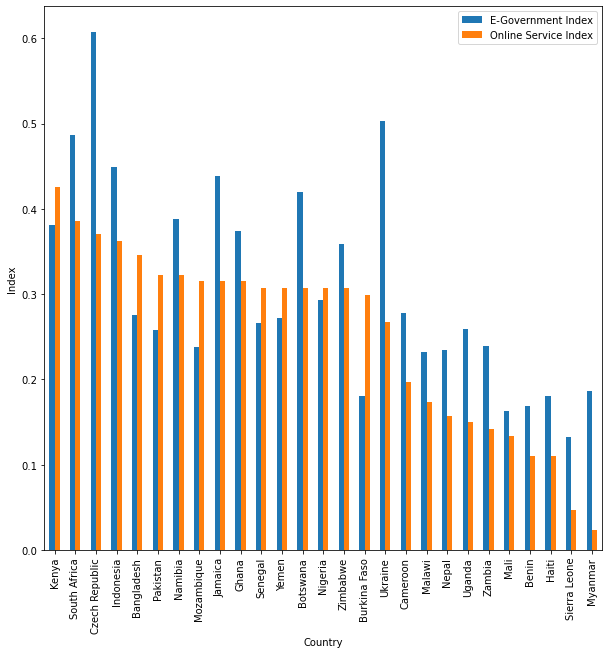

In [9]:
egov_online = df_2014[[ 'Country', "E-Government Index", "Online Service Index"]]
egov_online = egov_online.sort_values(by="Online Service Index", ascending = False)
low_rank1 = egov_online.iloc[52:80]
low_rank1 = low_rank1.set_index("Country");
fig, ax = plt.subplots(figsize = (10,10));
low_rank1.plot(kind="bar", ax=ax);
ax.set_xlabel('Country');
ax.set_ylabel('Index');

# E Participation Breakdown


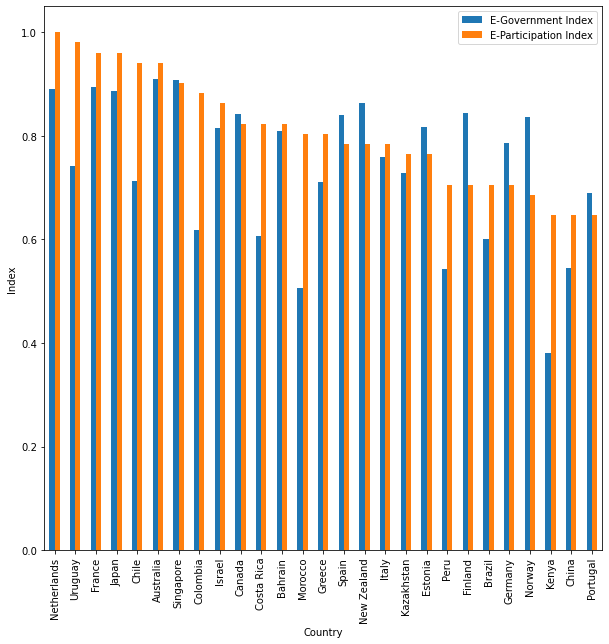

In [10]:
egov_epart = df_2014[[ 'Country', "E-Government Index", "E-Participation Index"]]
egov_epart = egov_epart.sort_values(by="E-Participation Index", ascending = False)
high_rank2 = egov_epart.iloc[0:27]
high_rank2 = high_rank2.set_index("Country")
fig, ax = plt.subplots(figsize = (10,10));
high_rank2.plot(kind="bar", ax=ax);
ax.set_xlabel('Country');
ax.set_ylabel('Index');

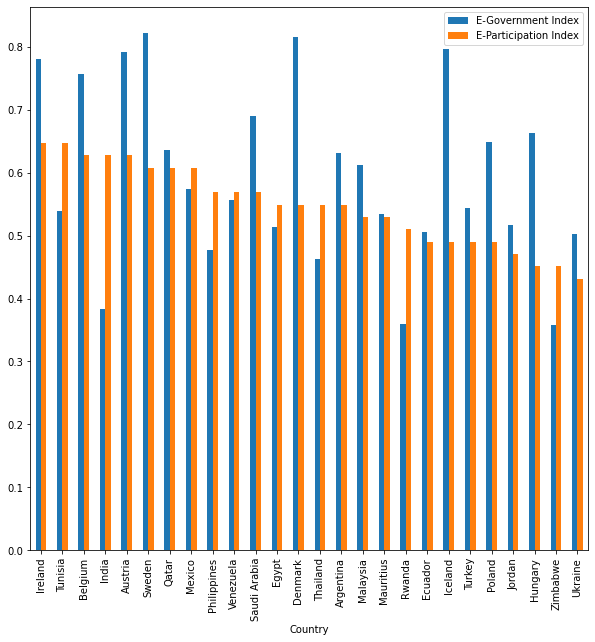

In [11]:
med_rank2 = egov_epart.iloc[27:53]
med_rank2 = med_rank2.set_index("Country")
fig, ax = plt.subplots(figsize = (10,10))
med_rank2.plot(kind="bar", ax=ax);

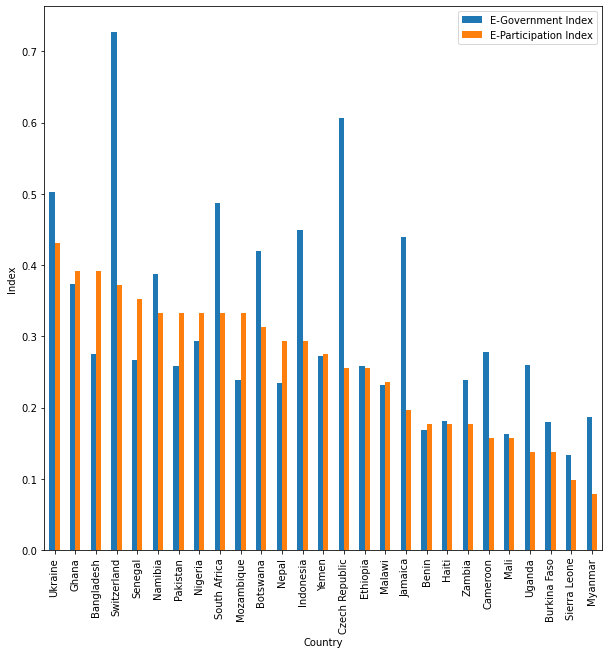

In [12]:
egov_epart = df_2014[[ 'Country', "E-Government Index", "E-Participation Index"]]
egov_epart = egov_epart.sort_values(by="E-Participation Index", ascending = False)
low_rank2 = egov_epart.iloc[52:80]
low_rank2 = low_rank2.set_index("Country");
fig, ax = plt.subplots(figsize = (10,10));
low_rank2.plot(kind="bar", ax=ax);
ax.set_xlabel('Country');
ax.set_ylabel('Index');

In [13]:
# print(med_rank1)
# print(med_rank2)

# Egov, odb, and impact

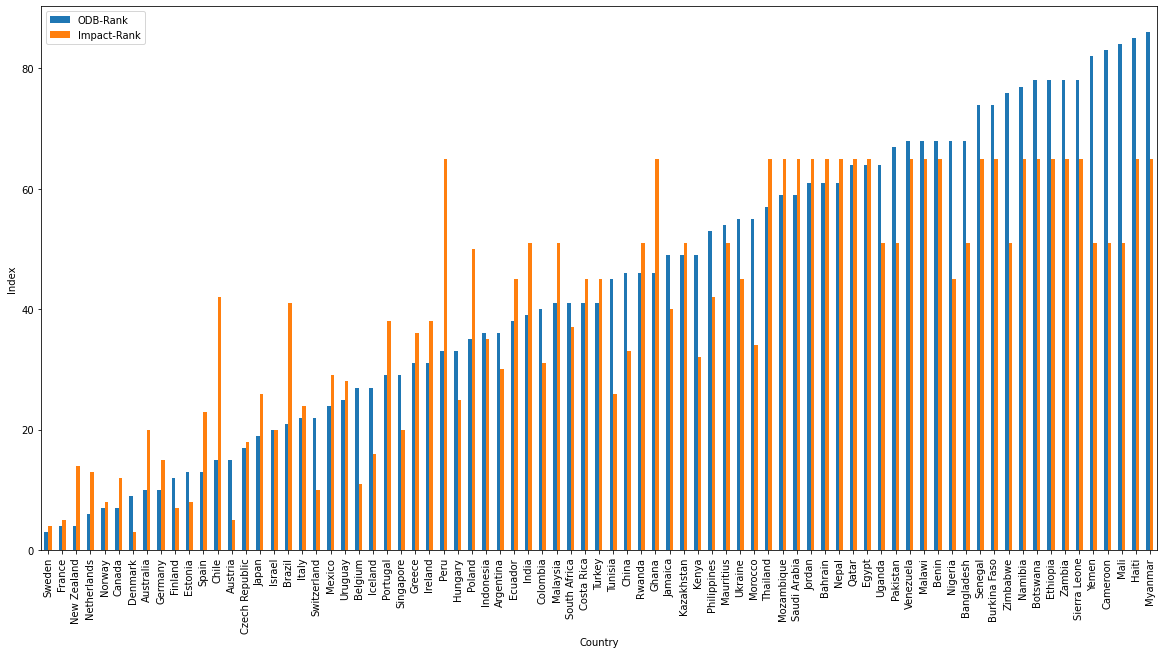

In [14]:
odb_impact = df_2014[['Country', "ODB-Rank", "Impact-Rank"]]
odb_impact = odb_impact.sort_values(by="ODB-Rank", ascending = True)
odb_impact = odb_impact.set_index("Country");
fig, ax = plt.subplots(figsize = (20,10));
odb_impact.plot(kind="bar", ax=ax);
ax.set_xlabel('Country');
ax.set_ylabel('Index');

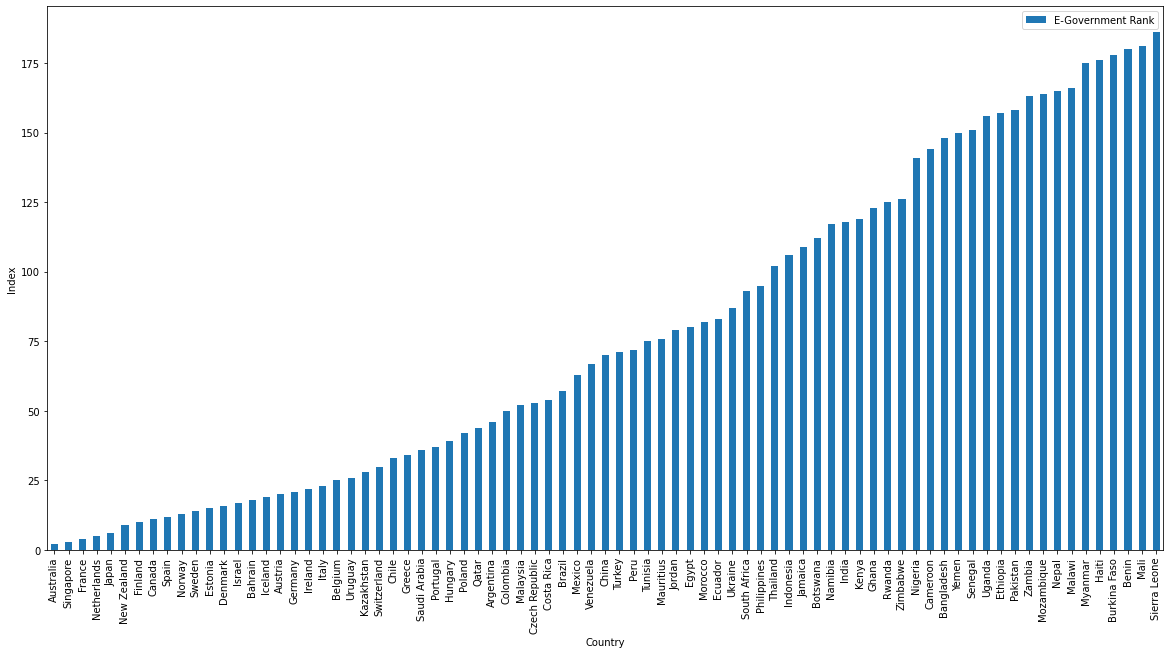

In [15]:
odb_impact = df_2014[['Country', 'E-Government Rank']]
odb_impact = odb_impact.sort_values(by="E-Government Rank", ascending = True)
odb_impact = odb_impact.set_index("Country");
fig, ax = plt.subplots(figsize = (20,10));
odb_impact.plot(kind="bar", ax=ax);
ax.set_xlabel('Country');
ax.set_ylabel('Index');

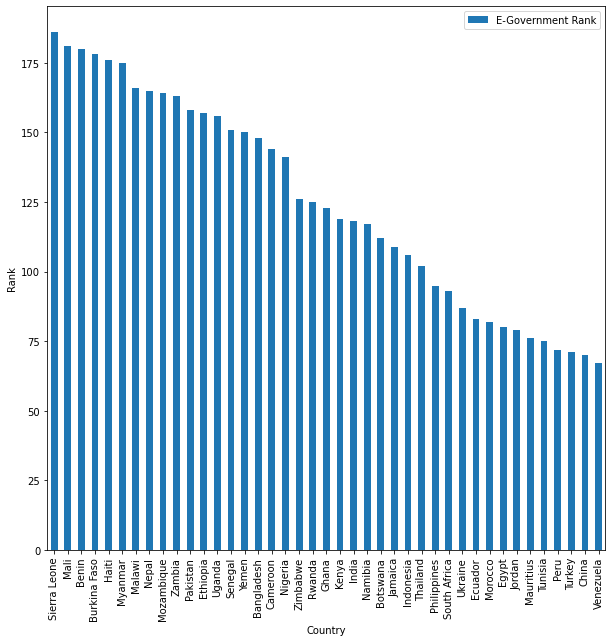

In [16]:
gov_rank = df_2014[[ 'Country', "E-Government Rank"]]
gov_rank = gov_rank.sort_values(by="E-Government Rank", ascending = False)
high_rank4 = gov_rank.iloc[0:41]
high_rank4 = high_rank4.set_index("Country");
fig, ax = plt.subplots(figsize = (10,10));
high_rank4.plot(kind="bar", ax=ax);
ax.set_xlabel('Country');
ax.set_ylabel('Rank');

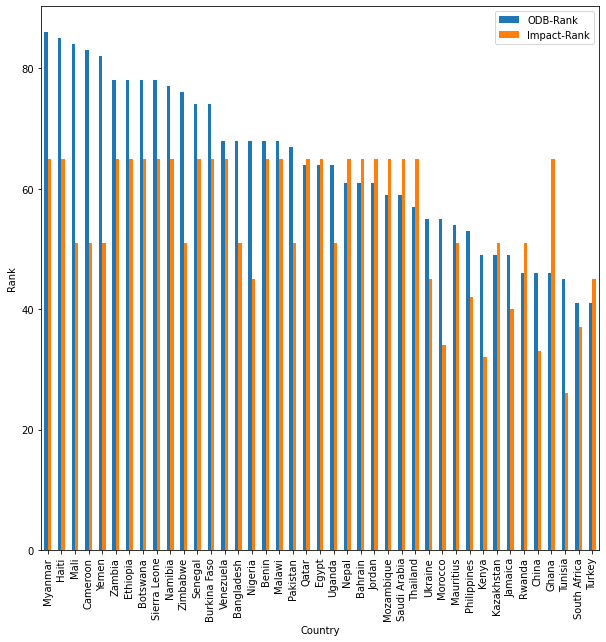

In [17]:
odb_rank = df_2014[[ 'Country', "ODB-Rank", 'Impact-Rank']]
odb_rank = odb_rank.sort_values(by="ODB-Rank", ascending = False)
high_rank3 = odb_rank.iloc[0:41]
high_rank3 = high_rank3.set_index("Country");
fig, ax = plt.subplots(figsize = (10,10));
high_rank3.plot(kind="bar", ax=ax);
ax.set_xlabel('Country');
ax.set_ylabel('Rank');

# E participation and human capital and egov rank

In [18]:
x_axis1 = df_2014['E-Government Index']
y_axis1 = df_2014['E-Participation Index']
x_axis2 = df_2014['E-Government Index']
y_axis2 = df_2014['Human Capital Index']
x_axis3 = df_2014['E-Government Index']
y_axis3 = df_2014['Telecommunication Infrastructure Index']

In [19]:
#Linear regression x1
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

#Linear regression x2
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_axis2, y_axis2)
regress_values2 = x_axis2 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

#Linear regression x3
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(x_axis3, y_axis3)
regress_values3 = x_axis3 * slope3 + intercept3
line_eq3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))

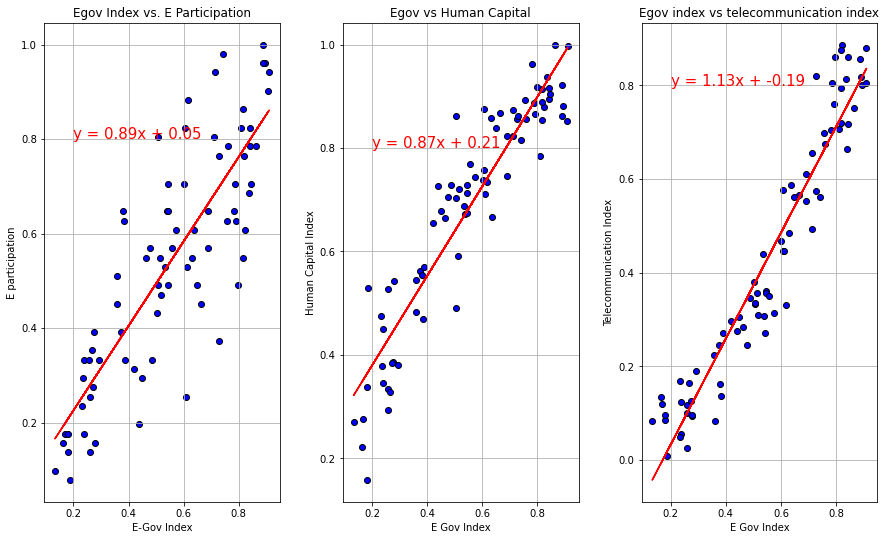

In [20]:
#Graph North and South Max temp versus latitude using multiple subplots
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (13,8), nrows=1, ncols =3);
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")
ax2.scatter(x_axis2, y_axis2, marker="o", facecolors="blue", edgecolors="black")
ax3.scatter(x_axis3, y_axis3, marker="o", facecolors="blue", edgecolors="black")

fig.tight_layout(pad=4)

#Set Labels on graph
ax1.set_xlabel('E-Gov Index');
ax1.set_ylabel('E participation');
ax1.set_title("Egov Index vs. E Participation");
ax2.set_xlabel('E Gov Index');
ax2.set_ylabel('Human Capital Index');
ax2.set_title("Egov vs Human Capital");
ax3.set_xlabel('E Gov Index');
ax3.set_ylabel('Telecommunication Index');
ax3.set_title("Egov index vs telecommunication index");

#Grid
ax1.grid()
ax2.grid()
ax3.grid()

#Line of best fit equation and plotting the line
ax1.annotate(line_eq1,(.2,.8),fontsize=15,color="red");
ax2.annotate(line_eq2, (.2, .8), fontsize=15, color="red");
ax1.plot(x_axis1,regress_values1,"r-");
ax2.plot(x_axis2,regress_values2,"r-");
ax3.annotate(line_eq3, (.2,.8), fontsize=15, color="red")
ax3.plot(x_axis3,regress_values3,"r-");



# Readiness vs. ODB Score Scaled

In [38]:
x_axis1 = df_2014['ODB-Score-Scaled']
y_axis1 = df_2014['Readiness-Scaled']

In [39]:
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

In [1]:
#Graph North and South Max temp versus latitude using multiple subplots
fig, ax1 = plt.subplots(figsize = (13,8));
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")

fig.tight_layout(pad=4)

#Set Labels on graph
ax1.set_xlabel('ODB Score');
ax1.set_ylabel('Readiness');
ax1.set_title("ODB Score vs. Readiness");


#Grid
ax1.grid()

#Line of best fit equation and plotting the line
ax1.annotate(line_eq1,(20,30),fontsize=15,color="red");
ax1.plot(x_axis1,regress_values1,"r-");

for i, label in enumerate(df_2014['Country']):
    plt.text(x_axis1[i], y_axis1[i],label)

# for index, label in enumerate(df_2014['Country']):
#     ax.annotate(label, (x_axis1[index], y_axis));

# for index, label in enumerate(df_2014['Country']):
#     ax.annotate(label, (df_2014.iloc[index, 7], df_2014.iloc[index, 8]));
    
# for i, label in enumerate(df_2014['Country']):
#     ax.annotate(label, (df_2014['ODB-Score-Scaled'][i], df_2014['Readiness-Scaled'][i]));    
    

NameError: name 'plt' is not defined

# Graphs for Egov/ODB Rank and ODBScore/EgovIndex*100

In [43]:
x_axis1 = df_2014['ODB-Rank']
y_axis1 = df_2014['E-Government Rank']
x_axis2 = df_2014['ODB-Score-Scaled']
y_axis2 = df_2014['E-Government Index'] *100

In [44]:
#Linear regression x1
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

#Linear regression x2
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_axis2, y_axis2)
regress_values2 = x_axis2 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

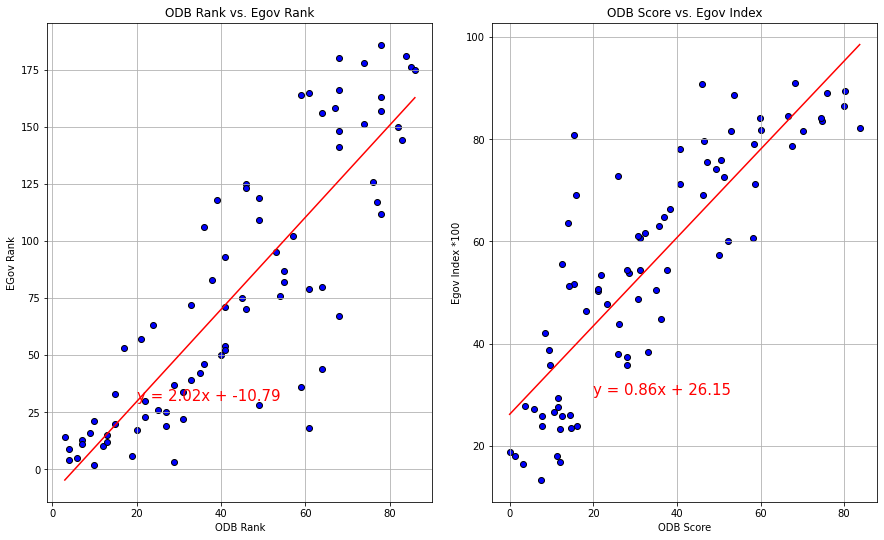

In [45]:
#Graph 
fig, (ax1, ax2) = plt.subplots(figsize = (13,8), nrows=1, ncols =2);
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")
ax2.scatter(x_axis2, y_axis2, marker="o", facecolors="blue", edgecolors="black")

fig.tight_layout(pad=4)

#Set Labels on graph
ax1.set_xlabel('ODB Rank');
ax1.set_ylabel('EGov Rank');
ax1.set_title("ODB Rank vs. Egov Rank");
ax2.set_xlabel('ODB Score');
ax2.set_ylabel('Egov Index *100');
ax2.set_title("ODB Score vs. Egov Index");

#Grid
ax1.grid()
ax2.grid()

#Line of best fit equation and plotting the line
ax1.annotate(line_eq1,(20,30),fontsize=15,color="red");
ax2.annotate(line_eq2, (20,30), fontsize=15, color="red");
ax1.plot(x_axis1,regress_values1,"r-");
ax2.plot(x_axis2,regress_values2,"r-");

# Graphs for ODB Rank and Implementation

In [46]:
#Set variables
x_axis1 = df_2014['ODB-Rank']
y_axis1 = df_2014['Implementation-Innovation-Scaled']
x_axis2 = df_2014['ODB-Rank']
y_axis2 = df_2014['Impact-Social-Scaled']
x_axis3 = df_2014['ODB-Rank']
y_axis3 = df_2014['Impact-Economic-Scaled']

In [47]:
#Linear regression x1
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

#Linear regression x2
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_axis2, y_axis2)
regress_values2 = x_axis2 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

#Linear regression x3
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(x_axis3, y_axis3)
regress_values3 = x_axis3 * slope3 + intercept3
line_eq3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))

#testing rsquared

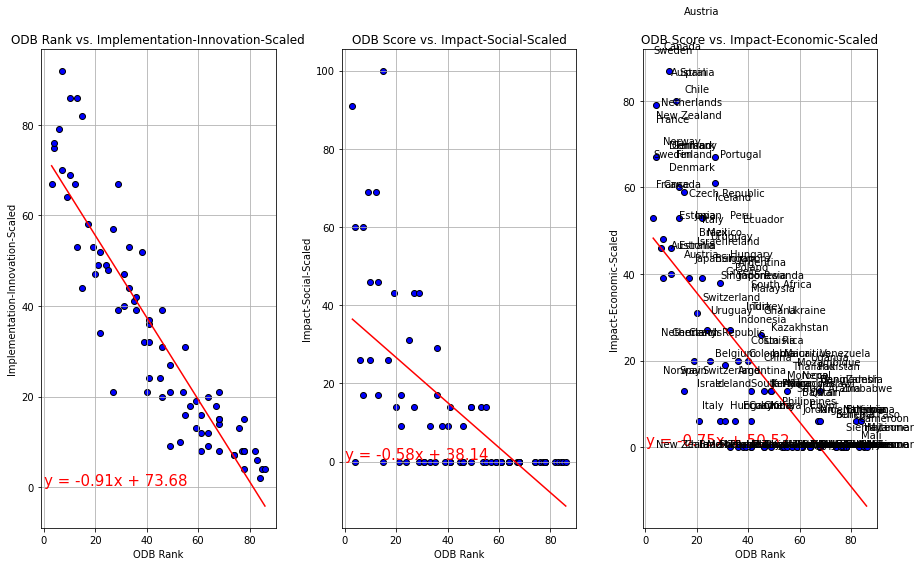

In [55]:
#Graph 
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (13,8), nrows=1, ncols =3);
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")
ax2.scatter(x_axis2, y_axis2, marker="o", facecolors="blue", edgecolors="black")
ax3.scatter(x_axis3, y_axis3, marker="o", facecolors="blue", edgecolors="black")
fig.tight_layout(pad=4)

#Set Labels on graph
ax1.set_xlabel('ODB Rank');
ax1.set_ylabel('Implementation-Innovation-Scaled');
ax1.set_title("ODB Rank vs. Implementation-Innovation-Scaled");
ax2.set_xlabel('ODB Rank');
ax2.set_ylabel('Impact-Social-Scaled');
ax2.set_title("ODB Score vs. Impact-Social-Scaled");
ax3.set_xlabel('ODB Rank');
ax3.set_ylabel('Impact-Economic-Scaled');
ax3.set_title("ODB Score vs. Impact-Economic-Scaled");

#Grid
ax1.grid()
ax2.grid()
ax3.grid()

#Line of best fit equation and plotting the line
ax1.annotate(line_eq1,(.2,.5),fontsize=15,color="red");
ax2.annotate(line_eq2, (.2,.5), fontsize=15, color="red");
ax3.annotate(line_eq3, (.2,.5), fontsize=15, color="red")
ax1.plot(x_axis1,regress_values1,"r-");
ax2.plot(x_axis2,regress_values2,"r-");
ax3.plot(x_axis3,regress_values3,"r-");


for i, label in enumerate(df_2014['Country']):
    plt.text(x_axis1[i], y_axis1[i],label)

# This is code from previous data - stop here.

In [30]:
csv_path1 = "../Resources/odb-rankings-2014.csv"
csv_path2 = "../Resources/odb-rankings-2016.csv"
csv_path3 = "../Resources/egov-rankings-2014.csv"
csv_path4 = "../Resources/egov-rankings-2016.csv"

In [31]:
df_egov_2014 = pd.read_csv(csv_path3)
df_egov_2014 = df_egov_2014.sort_values(by="E-Government Rank", ascending = True, ignore_index=True)

In [32]:
len(df_egov_2014["Survey Year"])

193

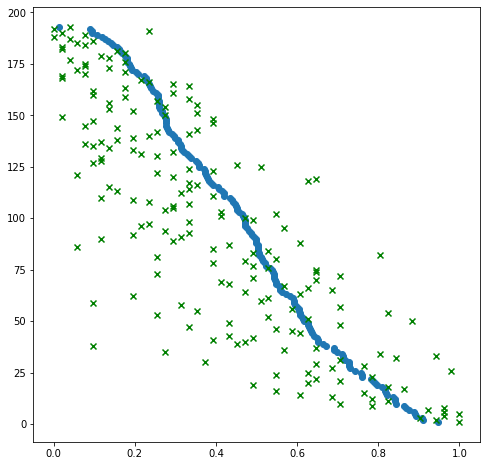

In [33]:
fig, ax = plt.subplots(figsize=(8,8));
y_axis = df_egov_2014['E-Government Rank']
x_axis1 = df_egov_2014['E-Government Index']
x_axis2 = df_egov_2014['E-Participation Index']
#x_axis3 = df_egov_2014['Online Service Index']
#x_axis4 = df_egov_2014['Human Capital Index']
#x_axis5 = df_egov_2014['Telecommunication Infrastructure Index']
ax.scatter(x_axis1, y_axis, marker = 'o')
ax.scatter(x_axis2, y_axis, marker = 'x', color='green')
# ax.scatter(x_axis3, y_axis, marker = 'v', color='red')
# ax.scatter(x_axis4, y_axis, marker = 'D', color='yellow')
# ax.scatter(x_axis5, y_axis, marker = '2', color='purple')

KeyError: 'Country Names'

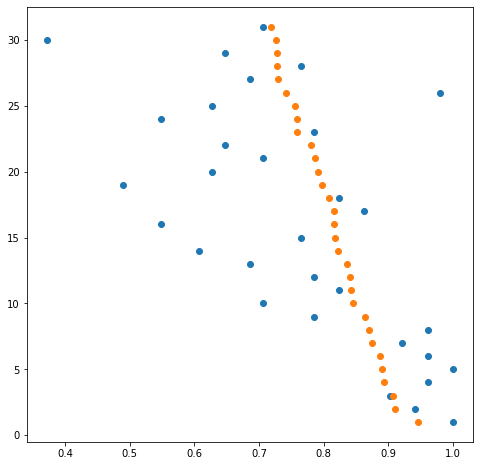

In [34]:
country_participation = df_egov_2014[["Country Name", "E-Participation Index"]]

x_axis = country_participation.iloc[0:31]['E-Participation Index']
y_axis = df_egov_2014.iloc[0:31]["E-Government Rank"]
x_axis2 = df_egov_2014.iloc[0:31]["E-Government Index"]
fig, ax = plt.subplots(figsize=(8,8));
ax.scatter(x_axis, y_axis);
ax.scatter(x_axis2, y_axis);
groups = df_egov_2014["Country Names"]
for name, groups in enumerate(names):
    ax.annotate(label, (x_axis[i], y_axis[i]));
names = df_egov_2014["Country Names"]

In [ ]:
df_egov_2016 = pd.read_csv(csv_path4)
df_egov_2016 = df_egov_2016.sort_values(by="E-Government Rank", ascending = True, ignore_index=True)
df_egov_2016.head()

In [ ]:
len(df_egov_2016['Survey Year'])

In [ ]:
fig, ax = plt.subplots(figsize=(8,8));
y_axis = df_egov_2016['E-Government Rank']
x_axis1 = df_egov_2016['E-Government Index']
x_axis2 = df_egov_2016['E-Participation Index']
x_axis3 = df_egov_2016['Online Service Index']
x_axis4 = df_egov_2016['Human Capital Index']
x_axis5 = df_egov_2016['Telecommunication Infrastructure Index']
ax.scatter(x_axis1, y_axis, marker = 'o')
ax.scatter(x_axis2, y_axis, marker = 'x', color='green')
ax.scatter(x_axis3, y_axis, marker = 'v', color='red')
ax.scatter(x_axis4, y_axis, marker = 'D', color='orange')
ax.scatter(x_axis5, y_axis, marker = '2', color='purple')

In [ ]:
df_odb_2014 = pd.read_csv(csv_path1)

In [ ]:
odb_2014 = pd.DataFrame([df_odb_2014['Year'], df_odb_2014['Region'], df_odb_2014['ISO2'], df_odb_2014['ISO3'], df_odb_2014['ODB-Rank'], df_odb_2014['Country'], df_odb_2014['ODB-Score-Scaled'], df_odb_2014['Readiness-Scaled'],df_odb_2014['Implementation-Innovation-Scaled'], df_odb_2014["Implementation-Social-Scaled"], df_odb_2014["Implementation-Accountability-Scaled"], df_odb_2014['Implementation-Rank'], df_odb_2014['Impact-Political-Scaled'], df_odb_2014["Impact-Social-Scaled"], df_odb_2014["Impact-Economic-Scaled"], df_odb_2014["Impact-Rank"], df_odb_2014['Cluster-Group']]).transpose()
odb_2014.head()
odb_2014.to_csv(r'../Resources/odb_2014.csv', header=True, index=True)

In [ ]:
len(odb_2014['Year'])

In [ ]:
df_odb_2016 = pd.read_csv(csv_path2)
df_odb_2016.head()

In [ ]:
odb_2016 = pd.DataFrame([df_odb_2016['Year'], df_odb_2016['Region'], df_odb_2016['ISO2'], df_odb_2016['ISO3'], df_odb_2016['ODB-Rank'], df_odb_2016['Country'], df_odb_2016['ODB-Score-Scaled'], df_odb_2016['Readiness-Scaled'],df_odb_2016['Implementation-Innovation-Scaled'], df_odb_2016["Implementation-Social-Scaled"], df_odb_2016["Implementation-Accountability-Scaled"], df_odb_2016['Implementation-Rank'], df_odb_2016['Impact-Political-Scaled'], df_odb_2016["Impact-Social-Scaled"], df_odb_2016["Impact-Economic-Scaled"], df_odb_2016["Impact-Rank"]]).transpose()
odb_2016.head()
odb_2016.to_csv(r'../Resources/odb_2016.csv', header=True, index=True)